In [140]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

**Separando a base de dados em treinamento e teste aleatoriamente**

In [143]:
train, test = train_test_split(dataset, test_size=0.25, train_size=0.75)
Y_train = train["PRECO"]
Y_test = test["PRECO"]

In [144]:
y_train = train["PRECO"].mean()
y_test = test["PRECO"].mean() # contem o preco previsto de um novo carro da base teste pelo moedelo de medias

In [145]:
rms_train = []
rms_test = []
num_train = []
dem_train = []
num_test = []
dem_test = []

trainpreco = train["PRECO"].tolist()
testpreco = test["PRECO"].tolist()

for a in trainpreco:
    rms_train.append((a-y_train)**2)
    num_train.append((a-y_train)**2)
    dem_train.append((a-y_train)**2)
for e in testpreco:
    rms_test.append((e-y_train)**2)
    num_test.append((e-y_train)**2)
    dem_test.append((e-y_test)**2)

RMS_train_M = np.sqrt(np.mean(rms_train))
RMS_test_M = np.sqrt(np.mean(rms_test))
R_train_M = 1-(sum(num_train)/sum(dem_train))
R_test_M = 1-(sum(num_test)/sum(dem_test))

In [146]:
R_train_M,RMS_train_M

(0.0, 12994.716614075536)

In [147]:
R_test_M, RMS_test_M

(-1.8544792206531824e-05, 13329.557358106766)

In [148]:
R_perc_M = 0
RMS_perc_M = ((RMS_test_M-RMS_train_M)/RMS_train_M)*100

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [149]:
X_train = train
X_test = test

#X_traindummy = pd.concat([dummify(X_train, "ESTADO").dropna()], axis=1), dummify(X_train, "MODELO").dropna(), dummify(X_train, "MARCA").dropna()], axis=1)
X_train = X_train.drop(columns = ["ID", "PRECO","ANO", "CIDADE", "ESTADO", "MARCA", "MODELO"])
#X_train = pd.concat([X_train, X_traindummy], axis = 1)

#X_testdummy = pd.concat([dummify(X_test, "ESTADO").dropna(), dummify(X_test, "MODELO").dropna(), dummify(X_test, "MARCA").dropna()], axis=1)
X_test = X_test.drop(columns = ["ID", "PRECO","ANO", "CIDADE", "ESTADO", "MARCA", "MODELO"])
#X_test = pd.concat([X_test, X_testdummy], axis = 1)

In [150]:
lista_erros = []
for k in range(1, 16):
    clf = KNeighborsRegressor(k)
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    lista_erros.append(mean_squared_error(Y_test,Y_pred))

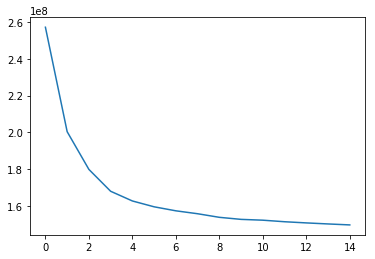

In [151]:
plt.plot(lista_erros);

In [152]:
#k =8 é  bom 
# como chego em  R e RMS atraves disso 

In [153]:
clf = KNeighborsRegressor(8)
clf.fit(X_train,Y_train)
Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)

In [154]:
rms_train_K = []
rms_test_K = []
num_train_K = []
dem_train_K = []
num_test_K = []
dem_test_K = []


for a in range(len(trainpreco)):
    rms_train_K.append((trainpreco[a]-Y_pred_train[a])**2)
    num_train_K.append((trainpreco[a]-Y_pred_train[a])**2)
    dem_train_K.append((trainpreco[a]-y_train)**2)
for e in range(len(testpreco)):
    rms_test_K.append((testpreco[e]-Y_pred_test[e])**2)
    num_test_K.append((testpreco[e]-Y_pred_test[e])**2)
    dem_test_K.append((testpreco[e]-y_test)**2)

RMS_train_K = np.sqrt(np.mean(rms_train_K))
RMS_test_K = np.sqrt(np.mean(rms_test_K))
R_train_K = 1-(sum(num_train_K)/sum(dem_train_K))
R_test_K = 1-(sum(num_test_K)/sum(dem_test_K))

In [155]:
R_train_K,RMS_train_K

(0.32034998131251236, 10712.959905794087)

In [156]:
R_test_K, RMS_test_K

(0.12307055533935063, 12482.28307072378)

In [157]:
R_perc_K = ((R_test_K-R_train_K)/R_train_K)*100
RMS_perc_K = ((RMS_test_K-RMS_train_K)/RMS_train_K)*100

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

Nesta céluka abaixo foi criado um dataframe com os valores de Rˆ2 e RMS de treinamento e de teste de cada variável, além disso o percentual do Rˆ2 e do RMS.

In [158]:
predicoes = ["Media", "K-NN", "Regressão", "Árvore de Decisão"]
R_TRAIN = [R_train_M, R_train_K, 0, 0]
R_TEST = [R_test_M, R_test_K, 0, 0]
R_PERC = [R_perc_M, R_perc_K, 0, 0]
RMS_TRAIN = [RMS_train_M, RMS_train_K, 0, 0]
RMS_TEST = [RMS_test_M, RMS_test_K, 0, 0]
RMS_PERC = [RMS_perc_M, RMS_perc_K, 0, 0]
PREDI = pd.DataFrame(data = predicoes)
PREDI.columns = ["Modelo"]
PREDI["Rˆ2 Treinamento"] = R_TRAIN
PREDI["Rˆ2 Teste"] = R_TEST
PREDI["Rˆ2 %"] = R_PERC
PREDI["RMS Treinamento"] = RMS_TRAIN
PREDI["RMS Teste"] = RMS_TEST
PREDI["RMS %"] = RMS_PERC

In [159]:
PREDI

,Modelo,Rˆ2 Treinamento,Rˆ2 Teste,Rˆ2 %,RMS Treinamento,RMS Teste,RMS %
0,Media,0.00000,-0.000019,0.000000,12994.716614,13329.557358,2.576745
1,K-NN,0.32035,0.123071,-61.582468,10712.959906,12482.283071,16.515727
2,Regressão,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Árvore de Decisão,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
